In [2]:
import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import wordcloud
# from wordcloud import WordCloud,STOPWORDS
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from sklearn.utils import shuffle
import matplotlib.ticker as mtick

# Plotly
# import colorlover as cl
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [9]:
data_raw = pd.read_csv('C:\\Users\\shirl\\Documents\\Neuro\\BIG-5-Re-clustering\\IPIP-FFM-data-8Nov2018\\data-final.csv', sep='\t')
df = data_raw.copy()
pd.options.display.max_columns = 150

# df.drop(df.columns[50:107], axis=1, inplace=True)
# df.drop(df.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(df))
df.head()

Number of participants:  1015341


EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  EST2  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0   1.0   4.0   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0   2.0   3.0   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0   4.0   4.0   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0   3.0   3.0   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0   1.0   5.0   

   EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  AGR3  AGR4  \
0   4.0   2.0   2.0   2.0   2.0   2.0   3.0    2.0   2.0   5.0   2.0   4.0   
1   4.0   1.0   3.0   1.0   2.0   1.0   3.0    1.0   1.0   4.0   1.0   5.0   
2   4.0   2.0   2.0   2.0   2.0   2.0   1.0    3.0   1.0   4.0   1.0   4.0   
3   3.0   2.0   3.0   2.0   2.0   2.0   4.0    3.0   2.0   4.0   3.0   4.0   
4   5.0   3.0   1.0   1.0   1.0   1.0   3.0    2.0   1.0   5.0   1.0   5.0   

   AGR5  AGR6  AGR7  AGR8  AGR9  AGR10  CSN1  CSN2  CSN3  CSN4  CSN5  CSN6  \
0   2.0   3.0   2.0   4.0   3.0    4.0   3.0   4.0   3.0   2.0   2.0   4.0   
1   1.0   5.0   3.0   4.0   5.0    3.0   3.0   2.0   5.0   3.0   3.0   1.0   
2   2.0   4.0   1.0   4.0   4.0    3.0   4.0   2.0   2.0   2.0   3.0   3.0   
3   2.0   4.0   2.0   4.0   3.0    4.0   2.0   4.0   4.0   4.0   1.0   2.0   
4   1.0   3.0   1.0   5.0   5.0    3.0   5.0   1.0   5.0   1.0   3.0   1.0   

   CSN7  CSN8  CSN9  CSN10  OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  \
0   4.0   2.0   4.0    4.0   5.0   1.0   4.0   1.0   4.0   1.0   5.0   3.0   
1   3.0   3.0   5.0    3.0   1.0   2.0   4.0   2.0   3.0   1.0   4.0   2.0   
2   4.0   2.0   4.0    2.0   5.0   1.0   2.0   1.0   4.0   2.0   5.0   3.0   
3   2.0   3.0   1.0    4.0   4.0   2.0   5.0   2.0   3.0   1.0   4.0   4.0   
4   5.0   1.0   5.0    5.0   5.0   1.0   5.0   1.0   5.0   1.0   5.0   3.0   

   OPN9  OPN10  EXT1_E  EXT2_E  EXT3_E  EXT4_E  EXT5_E  EXT6_E  EXT7_E  \
0   4.0    5.0  9419.0  5491.0  3959.0  4821.0  5611.0  2756.0  2388.0   
1   5.0    3.0  7235.0  3598.0  3315.0  2564.0  2976.0  3050.0  4787.0   
2   4.0    4.0  4657.0  3549.0  2543.0  3335.0  5847.0  2540.0  4922.0   
3   3.0    3.0  3996.0  2896.0  5096.0  4240.0  5168.0  5456.0  4360.0   
4   5.0    5.0  6004.0  3965.0  2721.0  3706.0  2968.0  2426.0  7339.0   

   EXT8_E   EXT9_E  EXT10_E  EST1_E  EST2_E  EST3_E  EST4_E  EST5_E  EST6_E  \
0  2113.0   5900.0   4110.0  6135.0  4150.0  5739.0  6364.0  3663.0  5070.0   
1  3228.0   3465.0   3309.0  9036.0  2406.0  3484.0  3359.0  3061.0  2539.0   
2  3142.0  14621.0   2191.0  5128.0  3675.0  3442.0  4546.0  8275.0  2185.0   
3  4496.0   5240.0   4000.0  3736.0  4616.0  3015.0  2711.0  3960.0  4064.0   
4  3302.0  16819.0   3731.0  4740.0  2856.0  7461.0  2179.0  3324.0  2255.0   

   EST7_E  EST8_E  EST9_E  EST10_E  AGR1_E   AGR2_E   AGR3_E  AGR4_E   AGR5_E  \
0  5709.0  4285.0  2587.0   3997.0  4750.0   5475.0  11641.0  3115.0   3207.0   
1  4226.0  2962.0  1799.0   1607.0  2158.0   2090.0   2143.0  2807.0   3422.0   
2  2164.0  1175.0  3813.0   1593.0  1089.0   2203.0   3386.0  1464.0   2562.0   
3  4208.0  2936.0  7336.0   3896.0  6062.0  11952.0   1040.0  2264.0   3664.0   
4  4308.0  4506.0  3127.0   3115.0  6771.0   2819.0   3682.0  2511.0  16204.0   

   AGR6_E   AGR7_E   AGR8_E  AGR9_E  AGR10_E  CSN1_E  CSN2_E  CSN3_E  CSN4_E  \
0  3260.0  10235.0   5897.0  1758.0   3081.0  6602.0  5457.0  1569.0  2129.0   
1  5324.0   4494.0   3627.0  1850.0   1747.0  5163.0  5240.0  7208.0  2783.0   
2  1493.0   3067.0  13719.0  3892.0   4100.0  4286.0  4775.0  2713.0  2813.0   
3  3049.0   4912.0   7545.0  4632.0   6896.0  2824.0   520.0  2368.0  3225.0   
4  1736.0  28983.0   1612.0  2437.0   4532.0  3843.0  7019.0  3102.0  3153.0   

   CSN5_E  CSN6_E  CSN7_E   CSN8_E   CSN9_E  CSN10_E  OPN1_E  OPN2_E   OPN3_E  \
0  3762.0  4420.0  9382.0   5286.0   4983.0   6339.0  3146.0  4067.0   2959.0   
1  4103.0  3431.0  3347.0   2399.0   3360.0   5595.0  2624.0  4985.0   1684.0

In [10]:
df.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=110)

# HEATMAPS

C:\Users\shirl\AppData\Local\Temp\ipykernel_3528\2551664858.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_Q.corr().abs(),annot=True,cmap='RdYlGn', ax=ax)


<AxesSubplot: >

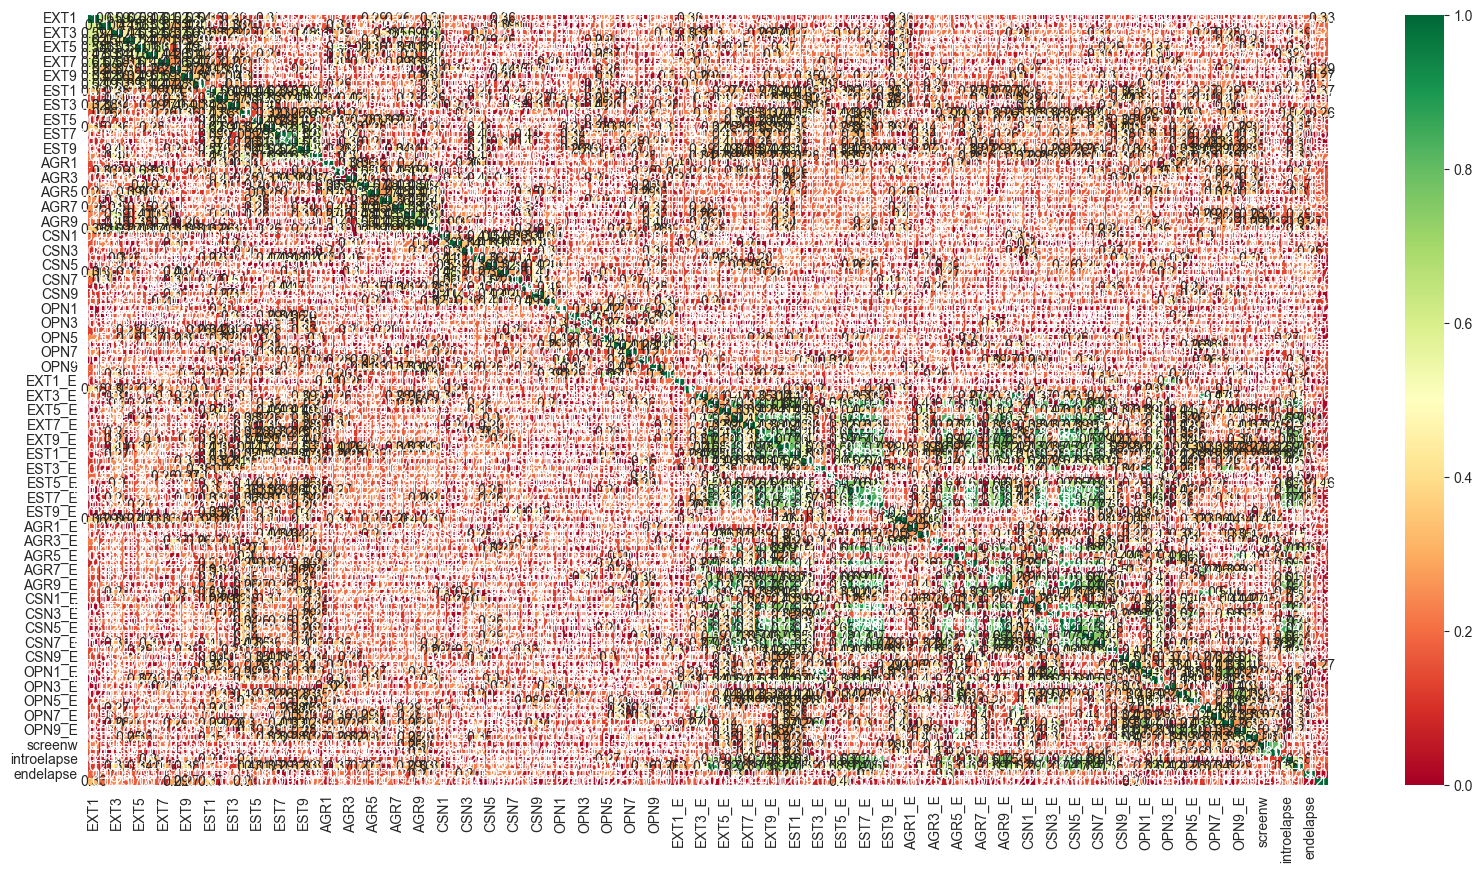

In [29]:
df_Q = df[0:50]
f,ax=plt.subplots(1,1,figsize=(20,10))
sns.heatmap(df_Q.corr().abs(),annot=True,cmap='RdYlGn', ax=ax)

<AxesSubplot: >

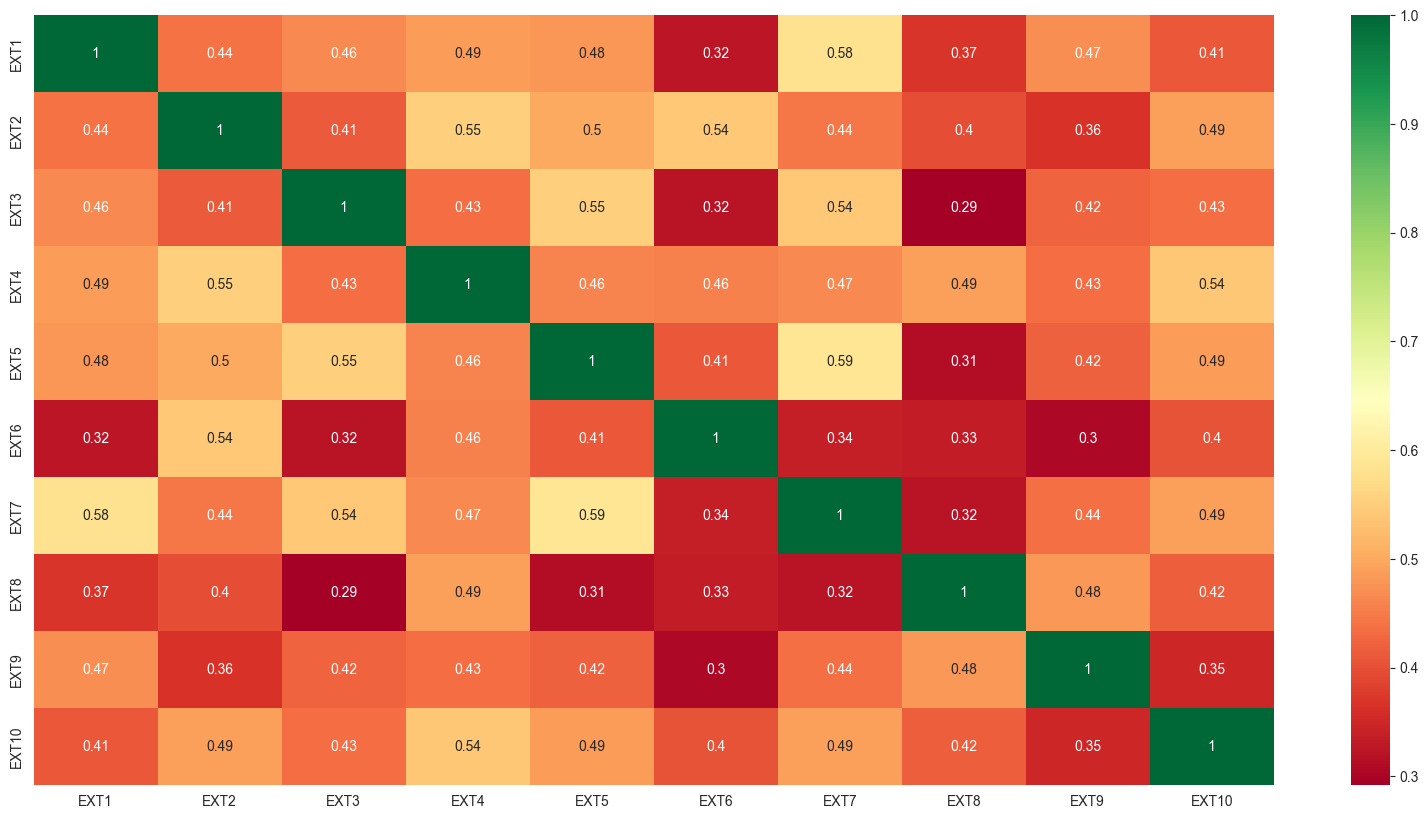

In [30]:
df_Q_EXT = df[['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10']]
f,ax=plt.subplots(1,1,figsize=(20,10))
sns.heatmap(df_Q_EXT.corr().abs(),annot=True,cmap='RdYlGn', ax=ax)

<AxesSubplot: >

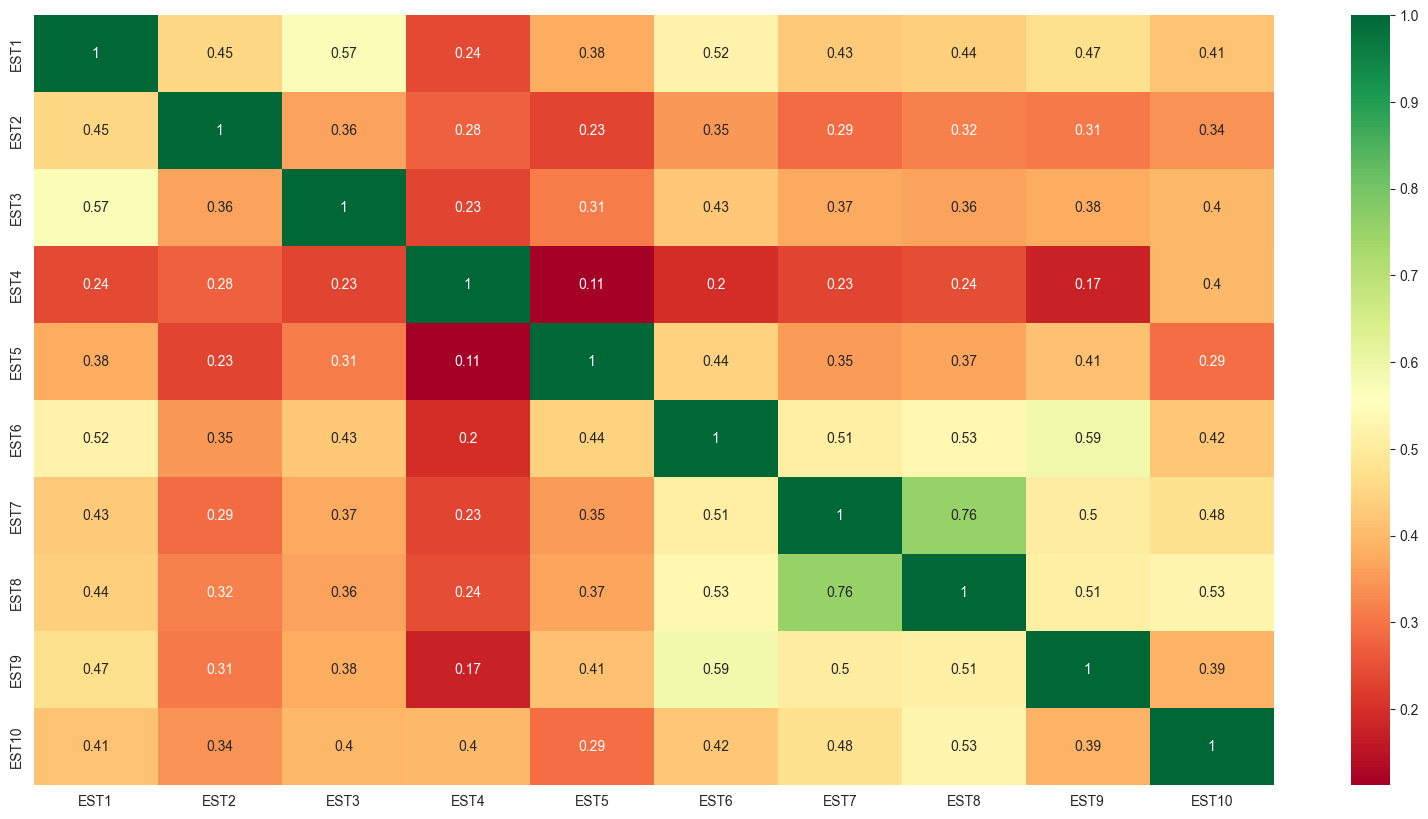

In [31]:
df_Q_EST = df[['EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10']]
f,ax=plt.subplots(1,1,figsize=(20,10))
sns.heatmap(df_Q_EST.corr().abs(),annot=True,cmap='RdYlGn', ax=ax)

<AxesSubplot: >

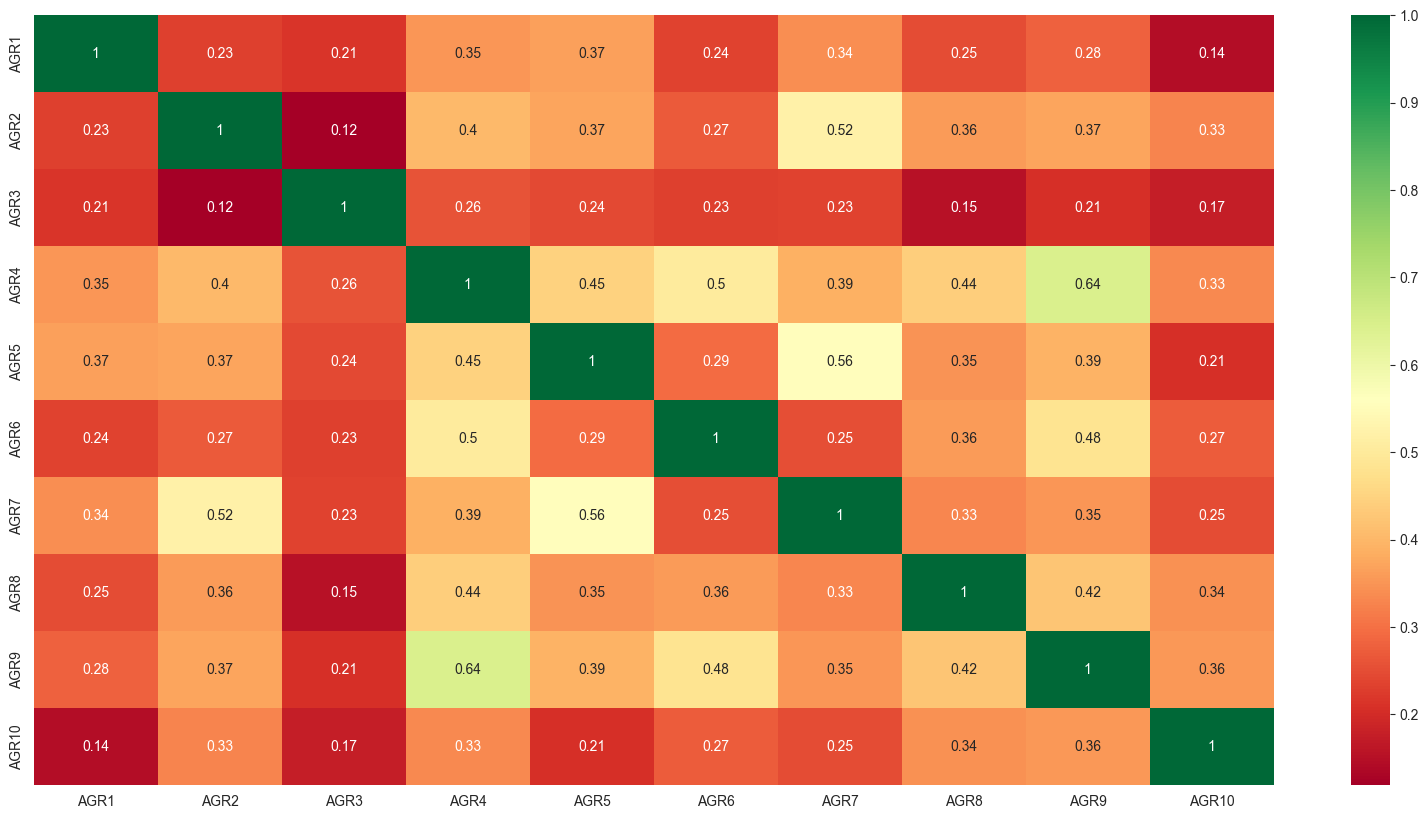

In [32]:
df_Q_AGR = df[['AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10']]
f,ax=plt.subplots(1,1,figsize=(20,10))
sns.heatmap(df_Q_AGR.corr().abs(),annot=True,cmap='RdYlGn', ax=ax)

<AxesSubplot: >

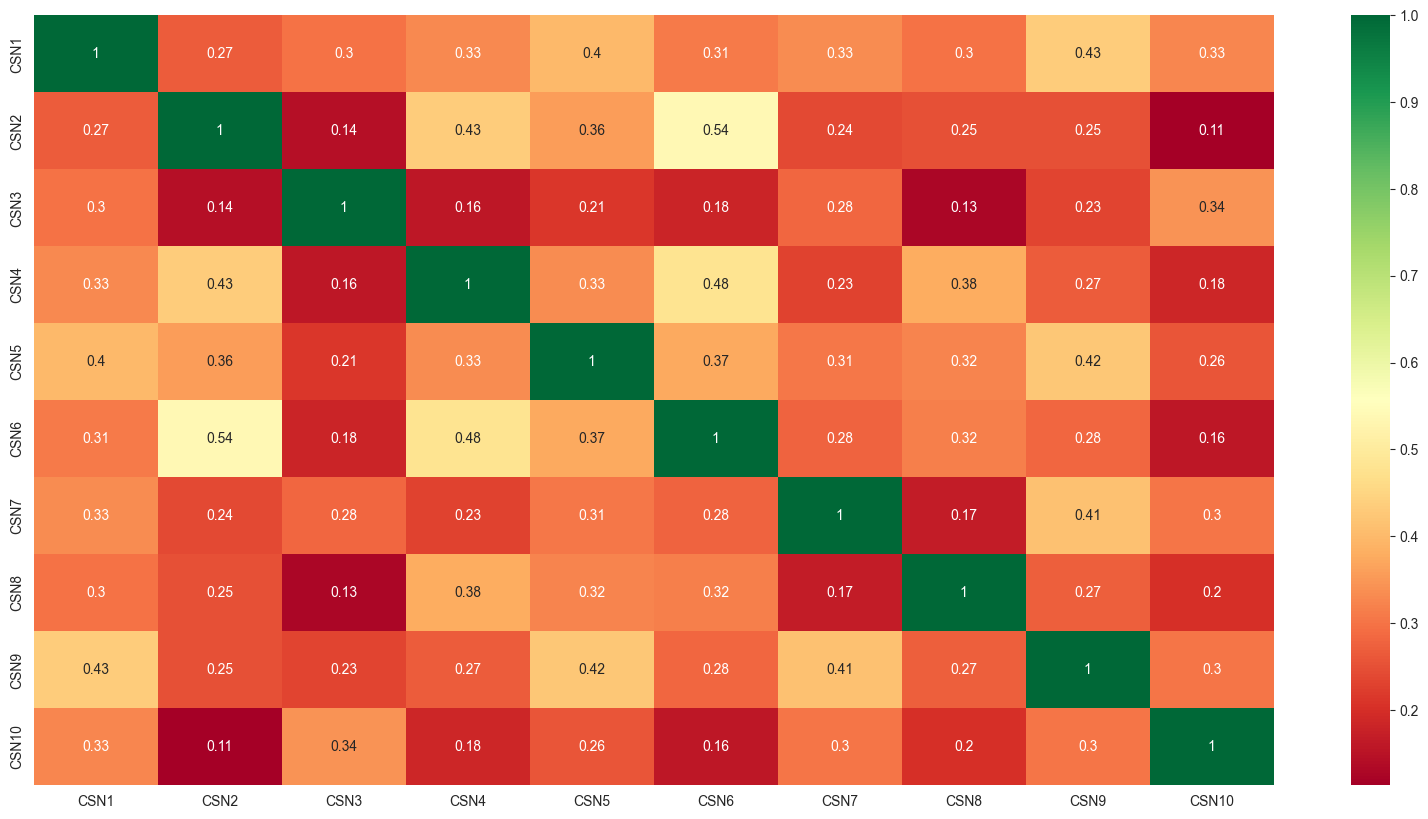

In [33]:
df_Q_CSN = df[['CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10']]
f,ax=plt.subplots(1,1,figsize=(20,10))
sns.heatmap(df_Q_CSN.corr().abs(),annot=True,cmap='RdYlGn', ax=ax)

<AxesSubplot: >

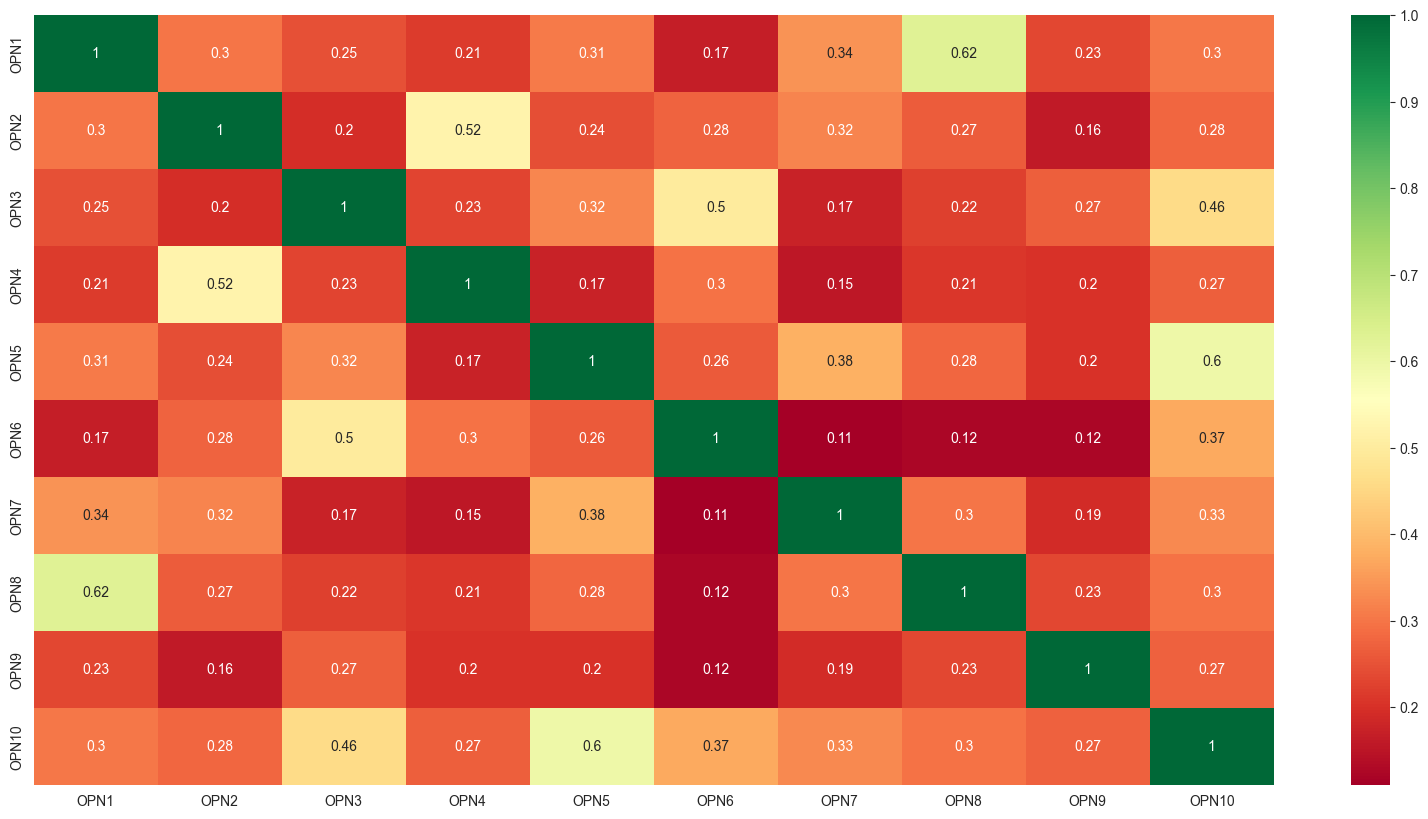

In [34]:
df_Q_OPN = df[['OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']]
f,ax=plt.subplots(1,1,figsize=(20,10))
sns.heatmap(df_Q_OPN.corr().abs(),annot=True,cmap='RdYlGn', ax=ax)

In [47]:
df['AVRG_EXT'] = df[['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10']].mean(axis=1)
df['AVRG_EST'] = df[['EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10']].mean(axis=1)
df['AVRG_AGR'] = df[['AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10']].mean(axis=1)
df['AVRG_CSN'] = df[['CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10']].mean(axis=1)
df['AVRG_OPN'] = df[['OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']].mean(axis=1)


In [49]:
df.head()


EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  EST2  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0   1.0   4.0   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0   2.0   3.0   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0   4.0   4.0   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0   3.0   3.0   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0   1.0   5.0   

   EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  AGR3  AGR4  \
0   4.0   2.0   2.0   2.0   2.0   2.0   3.0    2.0   2.0   5.0   2.0   4.0   
1   4.0   1.0   3.0   1.0   2.0   1.0   3.0    1.0   1.0   4.0   1.0   5.0   
2   4.0   2.0   2.0   2.0   2.0   2.0   1.0    3.0   1.0   4.0   1.0   4.0   
3   3.0   2.0   3.0   2.0   2.0   2.0   4.0    3.0   2.0   4.0   3.0   4.0   
4   5.0   3.0   1.0   1.0   1.0   1.0   3.0    2.0   1.0   5.0   1.0   5.0   

   AGR5  AGR6  AGR7  AGR8  AGR9  AGR10  CSN1  CSN2  CSN3  CSN4  CSN5  CSN6  \
0   2.0   3.0   2.0   4.0   3.0    4.0   3.0   4.0   3.0   2.0   2.0   4.0   
1   1.0   5.0   3.0   4.0   5.0    3.0   3.0   2.0   5.0   3.0   3.0   1.0   
2   2.0   4.0   1.0   4.0   4.0    3.0   4.0   2.0   2.0   2.0   3.0   3.0   
3   2.0   4.0   2.0   4.0   3.0    4.0   2.0   4.0   4.0   4.0   1.0   2.0   
4   1.0   3.0   1.0   5.0   5.0    3.0   5.0   1.0   5.0   1.0   3.0   1.0   

   CSN7  CSN8  CSN9  CSN10  OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  \
0   4.0   2.0   4.0    4.0   5.0   1.0   4.0   1.0   4.0   1.0   5.0   3.0   
1   3.0   3.0   5.0    3.0   1.0   2.0   4.0   2.0   3.0   1.0   4.0   2.0   
2   4.0   2.0   4.0    2.0   5.0   1.0   2.0   1.0   4.0   2.0   5.0   3.0   
3   2.0   3.0   1.0    4.0   4.0   2.0   5.0   2.0   3.0   1.0   4.0   4.0   
4   5.0   1.0   5.0    5.0   5.0   1.0   5.0   1.0   5.0   1.0   5.0   3.0   

   OPN9  OPN10  EXT1_E  EXT2_E  EXT3_E  EXT4_E  EXT5_E  EXT6_E  EXT7_E  \
0   4.0    5.0  9419.0  5491.0  3959.0  4821.0  5611.0  2756.0  2388.0   
1   5.0    3.0  7235.0  3598.0  3315.0  2564.0  2976.0  3050.0  4787.0   
2   4.0    4.0  4657.0  3549.0  2543.0  3335.0  5847.0  2540.0  4922.0   
3   3.0    3.0  3996.0  2896.0  5096.0  4240.0  5168.0  5456.0  4360.0   
4   5.0    5.0  6004.0  3965.0  2721.0  3706.0  2968.0  2426.0  7339.0   

   EXT8_E   EXT9_E  EXT10_E  EST1_E  EST2_E  EST3_E  EST4_E  EST5_E  EST6_E  \
0  2113.0   5900.0   4110.0  6135.0  4150.0  5739.0  6364.0  3663.0  5070.0   
1  3228.0   3465.0   3309.0  9036.0  2406.0  3484.0  3359.0  3061.0  2539.0   
2  3142.0  14621.0   2191.0  5128.0  3675.0  3442.0  4546.0  8275.0  2185.0   
3  4496.0   5240.0   4000.0  3736.0  4616.0  3015.0  2711.0  3960.0  4064.0   
4  3302.0  16819.0   3731.0  4740.0  2856.0  7461.0  2179.0  3324.0  2255.0   

   EST7_E  EST8_E  EST9_E  EST10_E  AGR1_E   AGR2_E   AGR3_E  AGR4_E   AGR5_E  \
0  5709.0  4285.0  2587.0   3997.0  4750.0   5475.0  11641.0  3115.0   3207.0   
1  4226.0  2962.0  1799.0   1607.0  2158.0   2090.0   2143.0  2807.0   3422.0   
2  2164.0  1175.0  3813.0   1593.0  1089.0   2203.0   3386.0  1464.0   2562.0   
3  4208.0  2936.0  7336.0   3896.0  6062.0  11952.0   1040.0  2264.0   3664.0   
4  4308.0  4506.0  3127.0   3115.0  6771.0   2819.0   3682.0  2511.0  16204.0   

   AGR6_E   AGR7_E   AGR8_E  AGR9_E  AGR10_E  CSN1_E  CSN2_E  CSN3_E  CSN4_E  \
0  3260.0  10235.0   5897.0  1758.0   3081.0  6602.0  5457.0  1569.0  2129.0   
1  5324.0   4494.0   3627.0  1850.0   1747.0  5163.0  5240.0  7208.0  2783.0   
2  1493.0   3067.0  13719.0  3892.0   4100.0  4286.0  4775.0  2713.0  2813.0   
3  3049.0   4912.0   7545.0  4632.0   6896.0  2824.0   520.0  2368.0  3225.0   
4  1736.0  28983.0   1612.0  2437.0   4532.0  3843.0  7019.0  3102.0  3153.0   

   CSN5_E  CSN6_E  CSN7_E   CSN8_E   CSN9_E  CSN10_E  OPN1_E  OPN2_E   OPN3_E  \
0  3762.0  4420.0  9382.0   5286.0   4983.0   6339.0  3146.0  4067.0   2959.0   
1  4103.0  3431.0  3347.0   2399.0   3360.0   5595.0  2624.0  4985.0   1684.0

<AxesSubplot: >

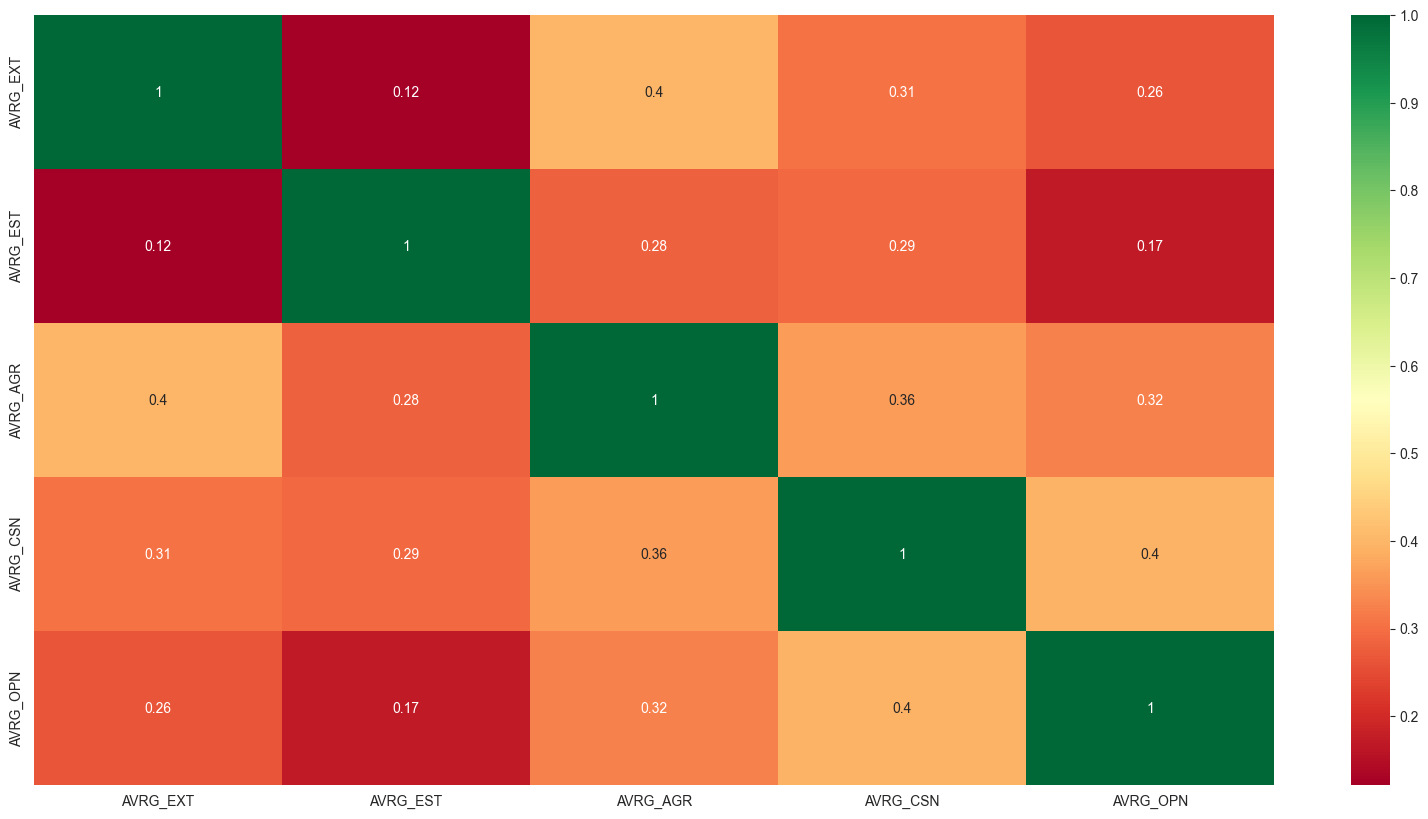

In [51]:
df_Q_AVRG = df[['AVRG_EXT', 'AVRG_EST', 'AVRG_AGR', 'AVRG_CSN', 'AVRG_OPN']]
f,ax=plt.subplots(1,1,figsize=(20,10))
sns.heatmap(df_Q_AVRG.corr(),annot=True,cmap='RdYlGn', ax=ax)